In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from statsmodels.tsa.stattools import adfuller
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
os.getcwd()

'C:\\Users\\ashok.swarna\\OneDrive - Accenture\\cenlar'

In [4]:
def load_file():
    
    df = pd.read_excel('external_regressors_main1.xlsx')
    df.head()
    df.reset_index(drop=True)
    df = df.set_index('Date')
    df.columns = df.columns.str.replace(' ', '_')
    cols = df.columns
    
    return df, cols

In [5]:
df , cols = load_file()

In [6]:
cols

Index(['STR', 'ARM', 'HPI', 'EMPL_non_farm_Employment', 'arm_adjustable_rates',
       'population_Millions', '30_year_Interest_rate_Mortgage', 'armrate',
       'r-mortg', 'spread-mortg', '1_year_Treasury', '10_years_Treasury',
       'treasury_Difference(Spread_treas)', 'unemploymet_rate'],
      dtype='object')

In [7]:
df.head()

,STR,ARM,HPI,EMPL_non_farm_Employment,arm_adjustable_rates,population_Millions,30_year_Interest_rate_Mortgage,armrate,r-mortg,spread-mortg,1_year_Treasury,10_years_Treasury,treasury_Difference(Spread_treas),unemploymet_rate
Date,,,,,,,,,,,,,,
2017-06-01,72238.0,3306.0,192.396,146533.0,3.14,324.96,3.90,4.17,3.90,0.27,0.733333,2.186818,1.453485,4.3
2017-07-01,72022.0,3078.0,193.655,146737.0,3.22,325.15,3.97,4.15,3.97,0.18,0.677419,2.207619,1.530200,4.3
2017-08-01,76276.0,2740.0,194.498,146924.0,3.15,325.34,3.88,4.16,3.88,0.28,0.741935,2.209130,1.467195,4.4
2017-09-01,73203.0,2375.0,194.974,146942.0,3.16,325.54,3.81,4.10,3.81,0.29,0.700000,2.097143,1.397143,4.2
2017-10-01,75028.0,2357.0,195.241,147202.0,3.18,325.73,3.90,4.21,3.90,0.31,0.709677,2.252727,1.543050,4.1


In [8]:
def train_Arima(train):
    
    arima = auto_arima(train,error_action='ignore', 
                       trace= True ,seasonal=False, m=12, suppress_warnings=True) 
    preds = arima.predict(n_periods=7)
                       
    return arima, preds

In [9]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [10]:
def metrics(y_test, test_pred):
    
    MSE =mean_squared_error(y_true=y_test, y_pred=test_pred)                
    MAE = mean_absolute_error(y_true=y_test, y_pred=test_pred)
    MAPE = mean_absolute_percentage_error(y_test, test_pred)

    return MSE, MAE, MAPE

# HPI

In [11]:
df_hpi=df['HPI']
df_hpi=df_hpi.sort_index()
df_hpi.head()

Date
2017-06-01    192.396
2017-07-01    193.655
2017-08-01    194.498
2017-09-01    194.974
2017-10-01    195.241
Name: HPI, dtype: float64

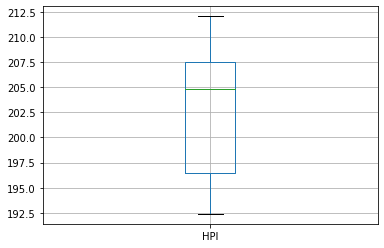

In [12]:


boxplot = df.boxplot(column=['HPI'])

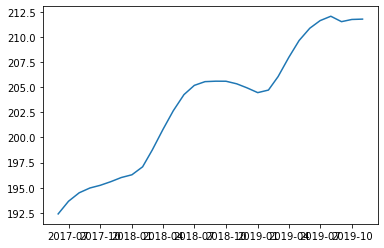

In [13]:
plt.plot(df_hpi)

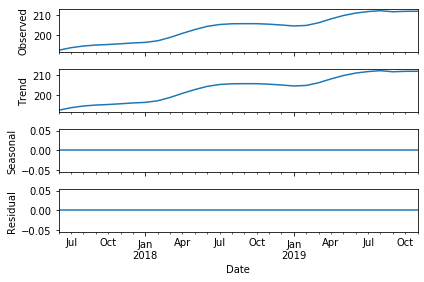

In [14]:
result = seasonal_decompose(df_hpi, model='additive', freq=1)
result.plot()
plt.show()

perform Duckey fuller test

In [15]:
result = adfuller(df_hpi)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.531958
p-value: 0.000172
Critical Values:
	1%: -3.809
	5%: -3.022
	10%: -2.651


In [16]:
hpi = df_hpi
hpi = hpi.reset_index(drop=True)
hpi.head()

0    192.396
1    193.655
2    194.498
3    194.974
4    195.241
Name: HPI, dtype: float64

In [17]:
a1_2017 = hpi.head(12)
a1_2018_ = hpi.tail(22)
a1_2018 = a1_2018_.head(12)
a1_2019 = hpi.tail(10)
a1_2017 = a1_2017.reset_index(drop=True)
a1_2018 = a1_2018.reset_index(drop=True)
a1_2019 = a1_2019.reset_index(drop=True)

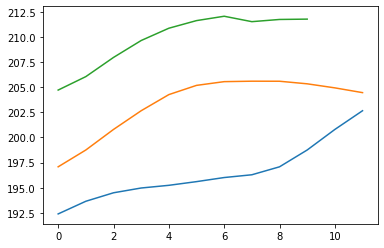

In [18]:
plt.plot(a1_2017)
plt.plot(a1_2018)
plt.plot(a1_2019)
plt.show()

In [19]:
#log transformation
ts_hpi = np.log(df_hpi)
result = adfuller(ts_hpi)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.569897
p-value: 0.000147
Critical Values:
	1%: -3.809
	5%: -3.022
	10%: -2.651


data was stationary try 1st order differencing on original dataset

In [20]:
X=df_hpi
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)

In [21]:
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.673999
p-value: 0.004494
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630


Now data is stationary check the same using KPSS as well

In [22]:
from statsmodels.tsa.stattools import kpss

In [23]:
kpsstest = kpss(diff, regression='c')
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output)

Test Statistic           0.270
p-value                  0.100
Lags Used                9.000
Critical Value (10%)     0.347
Critical Value (5%)      0.463
Critical Value (2.5%)    0.574
Critical Value (1%)      0.739
dtype: float64


C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


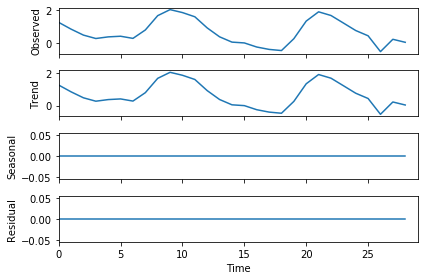

In [24]:

#test  statistic is less than the critical value at 10% hence can assue it is stationary
result = seasonal_decompose(diff, model='additive', freq=1)
result.plot()
plt.show()

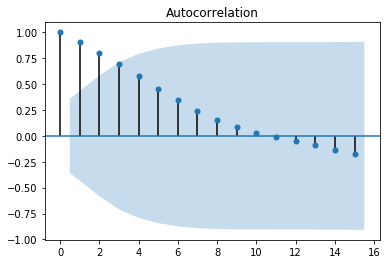

In [25]:
plot_acf(df_hpi, ax=plt.gca())
plt.show()

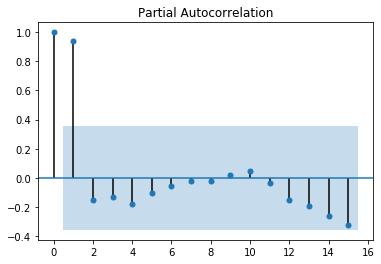

In [26]:
plot_pacf(df_hpi, ax=plt.gca())
plt.show()

In [41]:
#now fit the arima as the data is stationary
tr_hpi, te_hpi = df_hpi[:22], df_hpi[23:34]
model = SARIMAX(tr_hpi, order=(3, 1, 0), seasonal_order=(0, 0, 0, 1))
model_hpi = model.fit(disp=False)

C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [42]:
pred_hpi = model_hpi.predict(start = '2019-04-01', end ='2019-10-01')
print(pred_hpi)
print(tr_hpi)

2019-04-01    208.064437
2019-05-01    210.109683
2019-06-01    211.721832
2019-07-01    212.738021
2019-08-01    213.248812
2019-09-01    213.461319
2019-10-01    213.572695
Freq: MS, dtype: float64
Date
2017-06-01    192.396
2017-07-01    193.655
2017-08-01    194.498
2017-09-01    194.974
2017-10-01    195.241
2017-11-01    195.608
2017-12-01    196.015
2018-01-01    196.290
2018-02-01    197.082
2018-03-01    198.755
2018-04-01    200.799
2018-05-01    202.661
2018-06-01    204.265
2018-07-01    205.183
2018-08-01    205.554
2018-09-01    205.599
2018-10-01    205.594
2018-11-01    205.338
2018-12-01    204.935
2019-01-01    204.461
2019-02-01    204.716
2019-03-01    206.055
Name: HPI, dtype: float64


In [43]:
hpi_mse, hpi_mae, hpi_mape = metrics(te_hpi, pred_hpi)
print('HPI Metrics',hpi_mse, hpi_mae, hpi_mape)

HPI Metrics 1.8185799060074952 1.1945560730255604 0.5654749650894204


In [44]:
te_hpi

Date
2019-05-01    209.646000
2019-06-01    210.868000
2019-07-01    211.626000
2019-08-01    212.060000
2019-09-01    211.521000
2019-10-01    211.740000
2019-11-01    211.773667
Name: HPI, dtype: float64

In [ ]:
pred_hpi

# EMPL

In [ ]:
df_empl=df['EMPL_-_non-farm_Employment']
df_empl=df_empl.sort_index()
df_empl.head()

In [ ]:
boxplot = df.boxplot(column=['EMPL_-_non-farm_Employment'])

In [ ]:
result = seasonal_decompose(df_empl, model='additive', freq=1)
result.plot()
plt.show()

In [ ]:
result = adfuller(df_empl)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
empl = df_empl
empl = empl.reset_index(drop=True)
empl.head()

In [ ]:
a1_2017 = empl.head(12)
a1_2018_ = empl.tail(22)
a1_2018 = a1_2018_.head(12)
a1_2019 = empl.tail(10)
a1_2017 = a1_2017.reset_index(drop=True)
a1_2018 = a1_2018.reset_index(drop=True)
a1_2019 = a1_2019.reset_index(drop=True)

In [ ]:
a=plt.plot(a1_2017)
b= plt.plot(a1_2018)
c=plt.plot(a1_2019)
plt.show()

In [ ]:
#log transformation
ts_empl = np.log(df_empl)
result = adfuller(ts_empl)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
#differencing
X=df_empl
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)

In [ ]:
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
plt.plot(diff)

In [ ]:
#now data is stationary check with KPSS as well
kpsstest = kpss(diff, regression='c')
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output)


In [ ]:
plot_acf(df_empl, ax=plt.gca())
plt.show()

In [ ]:
plot_pacf(df_empl, ax=plt.gca())
plt.show()

In [ ]:
#now fit the arima as the data is stationary
tr_empl, te_empl = df_empl[:27], df_empl[27:34]
model = SARIMAX(tr_empl, order=(3, 1, 0), seasonal_order=(0, 0, 0, 1))
model_empl = model.fit(disp=False)

In [ ]:
pred_empl = model_empl.predict(start = '2019-04-01', end ='2019-10-01')
print(pred_empl)

In [ ]:
empl_mse, empl_mae, empl_mape = metrics(te_empl, pred_empl)
print('EMPL Metrics',empl_mse, empl_mae, empl_mape)

In [ ]:
pred_empl

In [ ]:
tr_empl

# ARM

In [ ]:
df_arm=df['arm_-_adjustable_rates']
df_arm=df_arm.sort_index()
df_arm.head()

In [ ]:
boxplot = df.boxplot(column=['arm_-_adjustable_rates'])

In [ ]:
result = seasonal_decompose(df_arm, model='additive', freq=1)
result.plot()
plt.show()

In [ ]:
result = adfuller(df_arm)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
plot_acf(df_arm, ax=plt.gca())
plt.show()

In [ ]:
plot_pacf(df_arm, ax=plt.gca())
plt.show()

In [ ]:
#the data is stationary at 5% and 10% interval

In [ ]:
train_arm, test_arm = df_arm[:27], df_arm[27:34]
arima_arm, pred_arm = train_Arima(train_arm)
arima_arm

In [ ]:
arm_mse, arm_mae, arm_mape = metrics(test_arm, pred_arm)
print('EMPL Metrics',arm_mse, arm_mae, arm_mape)

# population

In [ ]:
df_population=df['population(Millions)']
df_population=df_population.sort_index()
df_population.head()

In [ ]:
boxplot = df.boxplot(column=['population(Millions)'])

In [ ]:
result = seasonal_decompose(df_population, model='additive', freq=1)
result.plot()
plt.show()

In [ ]:
result = adfuller(df_population)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
plot_acf(df_population, ax=plt.gca())
plt.show()

In [ ]:
plot_pacf(df_population, ax=plt.gca())
plt.show()

In [ ]:
#clearly data is stationary
train_population, test_population = df_population[:27], df_population[27:34]
arima_population, pred_population = train_Arima(train_population)

In [ ]:
population_mse, population_mae, population_mape = metrics(test_population, pred_population)
print('EMPL Metrics',population_mse, population_mae, population_mape)

In [ ]:
pred_population

In [ ]:
test_population

# 30-year_Interest_rate_Mortgage

In [ ]:
#forecast for 30-year_Interest_rate_Mortgage
df_30_int=df['30-year_Interest_rate_Mortgage']
df_30_int=df_30_int.sort_index()
df_30_int.head()

In [ ]:
boxplot = df.boxplot(column=['30-year_Interest_rate_Mortgage'])

In [ ]:
result = seasonal_decompose(df_30_int, model='additive', freq=1)
result.plot()
plt.show()

In [ ]:
result = adfuller(df_30_int)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
#data is not stationary 
#perform log transformation and check
ts_30_int = np.log(df_30_int)
result = adfuller(ts_30_int)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
#even now data is not stationary, 
#perform differencing
#differencing
X=df_30_int
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)

In [ ]:
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
#data is staionary at 5 and 10 % interval
#now data is stationary check with KPSS as well
kpsstest = kpss(diff, regression='c')
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output)


In [ ]:
plt.plot(diff)

In [ ]:
#KPSS is showing data is not stationary
#performing the model as Dickey fuller test is working fine

In [ ]:
plot_acf(df_30_int, ax=plt.gca())
plt.show()

In [ ]:
plot_pacf(df_30_int, ax=plt.gca())
plt.show()

In [ ]:
#now fit the arima 
tr_30_int, te_30_int = df_30_int[:27], df_30_int[27:35]
model = SARIMAX(df_30_int, order=(3, 1, 0), seasonal_order=(0, 0, 0, 1))
model_30init = model.fit(disp=False)


In [ ]:
pred_30init = model_30init.predict(start = '2019-04-01', end ='2019-10-01')
print(pred_30init)

In [ ]:
int_30_mse, int_30_mae, int_30_mape = metrics(te_30_int, pred_30init)
print('EMPL Metrics',int_30_mse, int_30_mae, int_30_mape)

# ARMRATE

In [ ]:
df_armrate=df['armrate']
df_armrate=df_armrate.sort_index()
df_armrate.head()

In [ ]:
boxplot = df.boxplot(column=['armrate'
                            ])

In [ ]:
result = seasonal_decompose(df_armrate, model='additive', freq=1)
result.plot()
plt.show()

In [ ]:
result = adfuller(df_armrate)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
# data is not stationary, 
#perform differencing
#differencing
X=df_armrate
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)

In [ ]:
result = seasonal_decompose(diff, model='additive', freq=1)
result.plot()
plt.show()

In [ ]:
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
plt.plot(diff)

In [ ]:
plot_acf(df_armrate, ax=plt.gca())
plt.show()

In [ ]:
plot_pacf(df_armrate, ax=plt.gca())
plt.show()

In [ ]:
#now data is stationary
tr_armrate, te_armrate = df_armrate[:27], df_armrate[27:35]
model = SARIMAX(tr_armrate, order=(3, 1, 0), seasonal_order=(0, 0, 0, 1))
model_armrate = model.fit(disp=False)

In [ ]:
pred_armrate = model_armrate.predict(start = '2019-04-01', end ='2019-10-01')
print(pred_30init)

In [ ]:
te_armrate

In [ ]:
armrate_mse, armrate_mae, armrate_mape = metrics(te_armrate, pred_30init)
print('EMPL Metrics',armrate_mse, armrate_mae, armrate_mape)

# r-mortg

In [ ]:
df_rmortg=df['r-mortg']
df_rmortg=df_rmortg.sort_index()
df_rmortg.head()

In [ ]:
boxplot = df.boxplot(column=['r-mortg'])

In [ ]:
result = seasonal_decompose(df_rmortg, model='additive', freq=1)
result.plot()
plt.show()

In [ ]:
result = adfuller(df_rmortg)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
#not stationary
#perform log transformation and check
ts_rmortg = np.log(df_rmortg)
result = adfuller(ts_rmortg)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
#even now data is not stationary, 
#perform differencing
#differencing
X=df_rmortg
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)

In [ ]:
result = seasonal_decompose(diff, model='additive', freq=1)
result.plot()
plt.show()

In [ ]:
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
#AT 5% and 10 the data is stationary
#now stationary check with KPSS as well
kpsstest = kpss(diff, regression='c')
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output)

In [ ]:
#KPSS is showing data is not stationary
#performing the model as Dickey fuller test is working fine

In [ ]:
plot_acf(df_hpi, ax=plt.gca())
plt.show()

In [ ]:



plot_pacf(df_hpi, ax=plt.gca())
plt.show()

In [ ]:
#now fit the arima 
tr_rmortg, te_rmortg = df_rmortg[:27], df_rmortg[27:35]
model = SARIMAX(tr_rmortg, order=(3, 1, 0), seasonal_order=(0, 0, 0, 1))
model_rmortg = model.fit(disp=False)

In [ ]:
pred_rmortg = model_rmortg.predict(start = '2019-04-01', end ='2019-10-01')
print(pred_rmortg)

In [ ]:
rmortg_mse, rmortg_mae, rmortg_mape = metrics(te_rmortg, pred_rmortg)
print('EMPL Metrics',rmortg_mse, rmortg_mae, rmortg_mape)

# 1_year_Treasury

In [ ]:
df_1yr_tres=df['1_year_Treasury']
df_1yr_tres=df_1yr_tres.sort_index()
df_1yr_tres.head()

In [ ]:
boxplot = df.boxplot(column=['1_year_Treasury'])

In [ ]:
result = seasonal_decompose(df_1yr_tres, model='additive', freq=1)
result.plot()
plt.show()

In [ ]:
result = adfuller(df_1yr_tres)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
plot_acf(df_1yr_tres, ax=plt.gca())
plt.show()

In [ ]:
plot_pacf(df_1yr_tres, ax=plt.gca())
plt.show()

In [ ]:
#the data is stationary
train_1yr , test_1yr = df_1yr_tres[:27], df_1yr_tres[27:34]
arima_1yr, pred_1yr = train_Arima(train_1yr)
arima_1yr

In [ ]:
yr1_tres_mse, yr1_tres_mae, yr1_tres_mape = metrics(test_1yr, pred_1yr)
print('EMPL Metrics',yr1_tres_mse, yr1_tres_mae, yr1_tres_mape)

# 10_years_Treasury

In [ ]:
df_10yr_tres=df['10_years_Treasury']
df_10yr_tres=df_10yr_tres.sort_index()
df_10yr_tres.head()

In [ ]:
boxplot = df.boxplot(column=['10_years_Treasury'])

In [ ]:
result = adfuller(df_10yr_tres)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
result = seasonal_decompose(df_10yr_tres, model='additive', freq=1)
result.plot()
plt.show()

In [ ]:
#differencing
X=df_10yr_tres
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)

In [ ]:
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
plt.plot(diff)

In [ ]:
#not stationary
#perform log transformation and check
ts_10yr_tres = np.log(df_10yr_tres)
result = adfuller(ts_10yr_tres)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
#2nd order differencing
X=df_10yr_tres
diff2 = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 2]
    diff2.append(value)

In [ ]:
plt.plot(diff2)

In [ ]:
result = adfuller(diff2)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
#3rd order differencing
X=df_10yr_tres
diff3 = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 3]
    diff3.append(value)

In [ ]:
plt.plot(diff3)

In [ ]:
result = adfuller(diff3)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
plot_acf(df_10yr_tres, ax=plt.gca())
plt.show()

In [ ]:
plot_pacf(df_10yr_tres, ax=plt.gca())
plt.show()

In [ ]:
#at 3rd order differencing the data is stationary
#now fit the arima 
tr_10yr_tres, te_10yr_tres = df_10yr_tres[:27], df_10yr_tres[27:35]
model = SARIMAX(tr_10yr_tres, order=(5, 2, 0), seasonal_order=(0, 0, 0, 1))
model_10yr_tres = model.fit(disp=False)

In [ ]:
pred_10yr_tres = model_10yr_tres.predict(start = '2019-04-01', end ='2019-10-01')
print(pred_10yr_tres)

In [ ]:
te_10yr_tres

In [ ]:
yr10_tres_mse, yr10_tres_mae, yr10_tres_mape = metrics(te_10yr_tres, pred_10yr_tres)
print('EMPL Metrics',yr10_tres_mse, yr10_tres_mae, yr10_tres_mape)

# unemploymet_rate

In [ ]:
df_unemploy=df['unemploymet_rate']
df_unemploy=df_unemploy.sort_index()
df_unemploy.head()

In [ ]:
df.boxplot(column=['unemploymet_rate'])

In [ ]:
result = seasonal_decompose(df_unemploy, model='additive', freq=1)
result.plot()
plt.show()

In [ ]:
result = adfuller(df_unemploy)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
#differencing
X=df_unemploy
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)

In [ ]:
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
plt.plot(diff)

In [ ]:
plot_acf(df_hpi, ax=plt.gca())
plt.show()

In [ ]:
plot_pacf(df_hpi, ax=plt.gca())
plt.show()

In [ ]:
#data is stationary
#now fit the arima 
tr_unemploy, te_unemploy = df_rmortg[:27], df_rmortg[27:34]
model = SARIMAX(tr_unemploy, order=(3, 1, 0), seasonal_order=(0, 0, 0, 1))
model_unemploy = model.fit(disp=False)

In [ ]:
# detrend
pred_unemploy = model_unemploy.predict(start = '2019-04-01', end ='2019-10-01')
print(pred_30init)

In [ ]:
unemploy_mse, unemploy_mae, unemploy_mape = metrics(te_unemploy, pred_unemploy)
print('EMPL Metrics',unemploy_mse, unemploy_mae, unemploy_mape)

# MAPE for all the regressors on test data

In [ ]:
print('HPI MAPE:- ',hpi_mape)
print('EMPL MAPE:- ',empl_mape)
print('ARM MAPE:- ',arm_mape)
print('Population MAPE:- ',population_mape)
print('30 years mortgage interest MAPE:- ',int_30_mape)
print('ARM RATE MAPE:- ',armrate_mape)
print('R-MORTG MAPE:- ', rmortg_mape)
print('1 year treasury MAPE:- ',yr1_tres_mape)
print('10 Years treasury MAPE',yr10_tres_mape)
print('Unemployee MAPE:- ',unemploy_mape)

# Get all the 34 points predictions

In [ ]:
#do it as a csv
df_all = pd.DataFrame()

In [ ]:
df_all['HPI'] = model_hpi.predict(start = 0, end = 33)
df_all['EMPL_nonfarm_Employment'] = model_empl.predict(start = '2017-01-01', end ='2019-10-01')
df_all['arm_-_adjustable_rates'] = arima_arm.predict(n_periods=34)
df_all['population(Millions)'] = arima_population.predict(n_periods=34)
df_all['30year_Interest_rate_Mortgage'] = model_30init.predict(start = '2017-01-01', end ='2019-10-01')
df_all['armrate']= model_armrate.predict(start = '2017-01-01', end ='2019-10-01')
df_all['r_mortg'] = model_rmortg.predict(start = '2017-01-01', end ='2019-10-01')
df_all['spread-mortg'] =(df_all['armrate'] - df_all['30year_Interest_rate_Mortgage']).abs()
df_all['1_year_Treasury'] = arima_1yr.predict(n_periods=34)
df_all['10_years_Treasury'] = model_10yr_tres.predict(start = '2017-01-01', end ='2019-10-01')
df_all['treasury_Difference(Spread_treas)'] = (df_all['10_years_Treasury'] - df_all['1_year_Treasury']).abs()
df_all['unemploymet_rate'] = model_unemploy .predict(start = '2017-01-01', end ='2019-10-01')

In [ ]:
df_all.head()

In [ ]:
df_all.to_csv('Predicted_values.Csv', index=True)

In [ ]:
df_all['HPI'] = model_hpi.predict(start = 1, end = 33)
df_all['EMPL_nonfarm_Employment'] = model_empl.predict(start = '2017-02-01', end ='2019-10-01')
df_all['arm_adjustable_rates'] = arima_arm.predict(n_periods=34)
df_all['population_Millions'] = arima_population.predict(n_periods=34)
df_all['30year_Interest_rate_Mortgage'] = model_30init.predict(start = '2017-02-01', end ='2019-10-01')
df_all['armrate']= model_armrate.predict(start = '2017-02-01', end ='2019-10-01')
df_all['r_mortg'] = model_rmortg.predict(start = '2017-02-01', end ='2019-10-01')
df_all['spread-mortg'] =(df_all['armrate'] - df_all['30year_Interest_rate_Mortgage']).abs()
df_all['1_year_Treasury'] = arima_1yr.predict(n_periods=34)
df_all['10_years_Treasury'] = model_10yr_tres.predict(start = '2017-02-01', end ='2019-10-01')
df_all['treasury_Difference(Spread_treas)'] = (df_all['10_years_Treasury'] - df_all['1_year_Treasury']).abs()
df_all['unemploymet_rate'] = model_unemploy .predict(start = '2017-02-01', end ='2019-10-01')

In [ ]:
df_all.head()

In [ ]:
df_all.to_csv('Predicted_values1.Csv', index=True)

# MAPE for real and forecasted for all values

# Get future 6 months prediction

In [ ]:
#do it as a csv
df_for_future = pd.DataFrame()

In [ ]:
df_for_future['HPI'] = model_hpi.predict(start = '2019-12-01', end ='2020-02-01')
df_for_future['EMPL_nonfarm_Employment'] = model_empl.predict(start = '2019-12-01', end ='2020-02-01')
df_for_future['arm_-_adjustable_rates'] = arima_arm.predict(n_periods=6)
df_for_future['population(Millions)'] = arima_population.predict(n_periods=6)
df_for_future['30year_Interest_rate_Mortgage'] = model_30init.predict(start = '2019-12-01', end ='2020-02-01')
df_for_future['armrate']= model_armrate.predict(start = '2019-12-01', end ='2020-02-01')
df_for_future['r_mortg'] = model_rmortg.predict(start = '2019-12-01', end ='2020-02-01')
df_for_future['spread-mortg'] =(df_for_future['armrate'] - df_for_future['30year_Interest_rate_Mortgage']).abs()
df_for_future['1_year_Treasury'] = arima_1yr.predict(n_periods=3)
df_for_future['10_years_Treasury'] = model_10yr_tres.predict(start = '2019-12-01', end ='2020-02-01')
df_for_future['treasury_Difference(Spread_treas)'] = (df_for_future['10_years_Treasury'] - df_for_future['1_year_Treasury']).abs()
df_for_future['unemploymet_rate'] = model_unemploy .predict(start = '2019-12-01', end ='2020-02-01')

In [ ]:
df_for_future

In [ ]:
df_for_future.to_csv('Predicted_values_for_3_months.Csv', index=True)

# Predict for the train data and check the MAPE

In [ ]:
df_for_train = pd.DataFrame()

In [ ]:
df_for_train['HPI'] = model_hpi.predict(start = '2017-01-01', end ='2019-03-01')
df_for_train['EMPL_nonfarm_Employment'] = model_empl.predict(start = '2017-01-01', end ='2019-03-01')
df_for_train['arm_adjustable_rates'] = arima_arm.predict(n_periods=27)
df_for_train['population_Millions'] = arima_population.predict(n_periods=27)
df_for_train['y30year_Interest_rate_Mortgage'] = model_30init.predict(start = '2017-01-01', end ='2019-03-01')
df_for_train['armrate']= model_armrate.predict(start = '2017-01-01', end ='2019-03-01')
df_for_train['r_mortg'] = model_rmortg.predict(start = '2017-01-01', end ='2019-03-01')
df_for_train['spread-mortg'] =(df_for_train['armrate'] - df_for_train['y30year_Interest_rate_Mortgage']).abs()
df_for_train['y1_year_Treasury'] = arima_1yr.predict(n_periods=27)
df_for_train['y10_years_Treasury'] = model_10yr_tres.predict(start = '2017-01-01', end ='2019-03-01')
df_for_train['treasury_Difference(Spread_treas)'] = (df_for_train['y10_years_Treasury'] - df_for_train['y1_year_Treasury']).abs()
df_for_train['unemploymet_rate'] = model_unemploy .predict(start = '2017-01-01', end ='2019-03-01')

In [ ]:
hpi_mse_tr, hpi_mae_tr, hpi_mape_tr = metrics(tr_hpi, df_for_train.HPI)
empl_mse_tr, empl_mae_tr, empl_mape_tr = metrics(tr_empl, df_for_train.EMPL_nonfarm_Employment)
arm_mse_tr, arm_mae_tr, arm_mape_tr = metrics(train_arm, df_for_train.arm_adjustable_rates)
population_mse_tr, population_mae_tr, population_mape_tr = metrics(train_population, df_for_train.population_Millions)
int_30_msetr, int_30_maetr, int_30_mapetr = metrics(tr_30_int, df_for_train.y30year_Interest_rate_Mortgage)
armrate_msetr, armrate_maetr, armrate_mapetr = metrics(tr_armrate, df_for_train.armrate)
rmortg_msetr, rmortg_maetr, rmortg_mapetr = metrics(tr_rmortg, df_for_train.r_mortg)
yr1_tres_msetr, yr1_tres_maetr, yr1_tres_mapetr = metrics(train_1yr, df_for_train.y1_year_Treasury)
yr10_tres_msetr, yr10_tres_maetr, yr10_tres_mapetr = metrics(tr_10yr_tres, df_for_train.y10_years_Treasury)
unemploy_msetr, unemploy_maetr, unemploy_mapetr = metrics(tr_unemploy, df_for_train.unemploymet_rate)

# MAPE for the train data

In [ ]:
print('HPI MAPE:- ',hpi_mape_tr)
print('EMPL MAPE:- ',empl_mape_tr)
print('ARM MAPE:- ',arm_mape_tr)
print('Population MAPE:- ',population_mape_tr)
print('30 years mortgage interest MAPE:- ',int_30_mapetr)
print('ARM RATE MAPE:- ',armrate_mapetr)
print('R-MORTG MAPE:- ', rmortg_mapetr)
print('1 year treasury MAPE:- ',yr1_tres_mapetr)
print('10 Years treasury MAPE',yr10_tres_mapetr)
print('Unemployee MAPE:- ',unemploy_mapetr)

In [ ]:
df_for_train.to_csv("Prediction_on_train_set.CSV", index=True)